In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
from keras.callbacks import ModelCheckpoint
import keras.callbacks

In [3]:
pwd

'C:\\Users\\B.THUSHAR\\Desktop\\ML projects\\Face  recognition'

In [7]:
train_dir=r"C:/Users/B.THUSHAR/Desktop/ML projects/Face  recognition/train dataset/"
test_dir=r"C:/Users/B.THUSHAR/Desktop/ML projects/Face  recognition/test dataset/"

In [13]:
def getfiles(direc):
    x=os.listdir(direc)
    
    count=0
    for i in x:
        count+=len(os.listdir(direc+i))
        print("there are {} num of images of class {}".format(len(os.listdir(direc+i)),i))
    print("total images {}".format(count))  

In [14]:
getfiles(train_dir),getfiles(test_dir)

there are 1460 num of images of class without_mask
there are 1683 num of images of class with_mask
total images 3143
there are 232 num of images of class with_mask
there are 458 num of images of class with_out_mask
total images 690


(None, None)

In [15]:
# Pre-processing data with parameters.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height), batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=False,target_size=(img_width,img_height),batch_size=batch_size)

Found 3143 images belonging to 2 classes.
Found 690 images belonging to 2 classes.


In [17]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [18]:
num_classes=2

In [19]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(AveragePooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
average_pooling2d_1 (Average (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
average_pooling2d_2 (Average (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11552)            

In [20]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_1', 'average_pooling2d_1', 'conv2d_2', 'average_pooling2d_2', 'conv2d_3', 'max_pooling2d_1', 'flatten_1', 'dense_1', 'dropout_1', 'dense_2', 'dense_3']


In [22]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)
opt=keras.optimizers.Adam(lr=0.001)

Found 3143 images belonging to 2 classes.


In [23]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
train=model.fit_generator(train_generator,epochs=20,steps_per_epoch=train_generator.samples//batch_size,validation_data=validation_generator,validation_steps=validation_generator.samples // batch_size,verbose=1)

Epoch 1/20


C:\Users\B.THUSHAR\anaconda3\envs\tensorflow_env\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


98/98 [==============================] - 363s 4s/step - loss: 0.3744 - accuracy: 0.8492 - val_loss: 0.1966 - val_accuracy: 0.8798
Epoch 2/20
98/98 [==============================] - 86s 880ms/step - loss: 0.2316 - accuracy: 0.9081 - val_loss: 0.3471 - val_accuracy: 0.9286
Epoch 3/20
98/98 [==============================] - 85s 863ms/step - loss: 0.2037 - accuracy: 0.9286 - val_loss: 0.1811 - val_accuracy: 0.9437
Epoch 4/20
98/98 [==============================] - 82s 841ms/step - loss: 0.1921 - accuracy: 0.9290 - val_loss: 0.2942 - val_accuracy: 0.9174
Epoch 5/20
98/98 [==============================] - 82s 838ms/step - loss: 0.1834 - accuracy: 0.9357 - val_loss: 0.2108 - val_accuracy: 0.9283
Epoch 6/20
98/98 [==============================] - 81s 826ms/step - loss: 0.1706 - accuracy: 0.9399 - val_loss: 0.2130 - val_accuracy: 0.9502
Epoch 7/20
98/98 [==============================] - 81s 827ms/step - loss: 0.1427 - accuracy: 0.9482 - val_loss: 0.3854 - val_accuracy: 0.9341
Epoch 8/20
9

In [25]:
model.save(r"C:/Users/B.THUSHAR/Desktop/ML projects/Face  recognition/face_model97.78.h5")

In [26]:
from keras.models import load_model
model=load_model(r"C:/Users/B.THUSHAR/Desktop/ML projects/Face  recognition/face_model97.78.h5")

In [27]:
score,accuracy =model.evaluate(test_generator,verbose=1)
score=round(score,2)
accuracy=round(accuracy,3)
# print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

22/22 [==============================] - 11s 494ms/step
Test accuracy is 0.975


In [28]:
Y_pred = model.predict_generator(test_generator, test_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = train_generator.class_indices
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[217  15]
 [  2 456]]
Classification Report
              precision    recall  f1-score   support

   with_mask       0.99      0.94      0.96       232
without_mask       0.97      1.00      0.98       458

    accuracy                           0.98       690
   macro avg       0.98      0.97      0.97       690
weighted avg       0.98      0.98      0.98       690



In [29]:
test_generator.class_indices

{'with_mask': 0, 'with_out_mask': 1}

In [30]:
Classes=["with_mask","no_mask"]

<class 'numpy.ndarray'> (256, 256, 3)
(1, 256, 256, 3)
no_mask


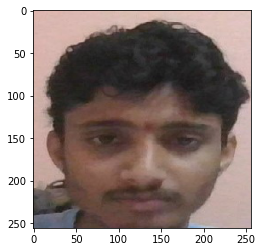

In [56]:
import numpy as np
import matplotlib.pyplot as plt# Pre-Processing test data same as train data.
img_width=256
img_height=256
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    plt.imshow(x)
    print(type(x),x.shape)
    y=np.expand_dims(x, axis=0)
    print(y.shape)
    return np.expand_dims(x, axis=0)
    
path= r"C:/Users/B.THUSHAR/Desktop/ML projects/Face  recognition/1 (1).jpg"  
result = model.predict_classes([prepare(path)])

# print(result)
disease=image.load_img(path)
# plt.imshow(disease)
print (Classes[int(result)])

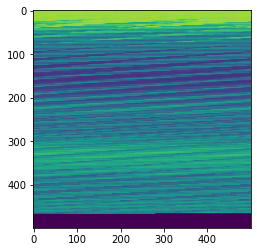

In [68]:
img=image.load_img(path)
x = image.img_to_array(img)
x=x/255
x.resize(500,500)
plt.imshow(x)

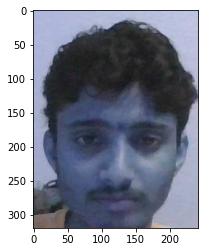

In [72]:
import cv2 
image = cv2.imread(path) 
plt.imshow(image)
new_image = cv2.resize(image,(500,500))
# plt.imshow(new_image)

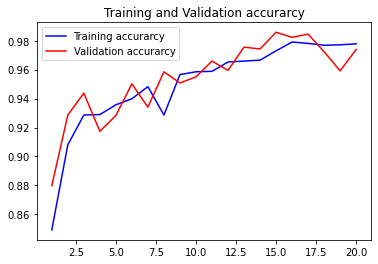

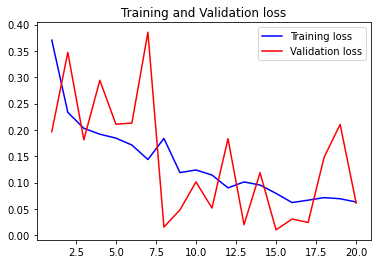

In [32]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()